# Comparison Between the Microwave Uncertainty Framework and The Current Calibration Services Work Flow 05/2017 for a one-port 3.5mm system

This Notebook summarizes the comparison between using the current calibration services workflow and the microwave uncertainty framework to derive both nominal values and uncertainties. The data used in this comparison was acquired by Ron Ginley and ...

The comparison centers on the following data sources:
1. The measurement of devices M105,M110,N101,N202,N203, N205. 
2. Comparisons incorporate the raw values, the nominal value returned by the MUF, the mean of montecarlo values returned by the MUF.
3. Uncertainty calculations use calrep, the sensitivity analysis from the MUF and the montecarlo analysis from the MUF.


In [1]:
from pyMeasure import *

Importing pyMeasure, this should take roughly 30 seconds
The module smithplot was not found,please put it on the python path
The module smithplot was not found,please put it on the python path


## Device M105

In [24]:
raw_directory=r"C:\Share\35CalComp\35_ascii_results"
montecarlo_directory=r"C:\Share\35CalComp\MUF_results\DUTs\M105P1_Support\MonteCarlo"
sensitivity_directory=r"C:\Share\35CalComp\MUF_results\DUTs\M105P1_Support\Covariance"
nominal_path=r"C:\Share\35CalComp\MUF_results\DUTs\M105P1_Support\M105P1_0.s2p"

In [25]:
measurement_names=['M105P1.L1_030716','M105P2.L1_030716']
model_name=sparameter_power_type(os.path.join(raw_directory,measurement_names[0]))
#raw_type(os.path.join(raw_directory,'M105P1.L1_030716'))
model=globals()[model_name]
measurements=map(lambda x:model(os.path.join(raw_directory,x)),measurement_names)


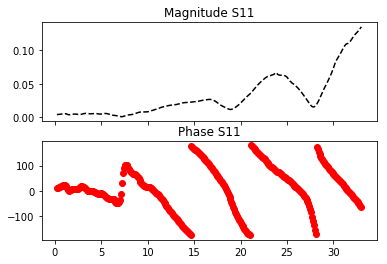

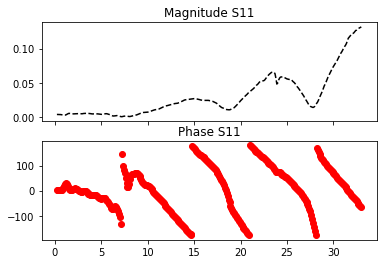

In [4]:
for measurement in measurements:
    measurement.show();


In [26]:
calrep_measurements=map(lambda x: calrep(x), measurements)

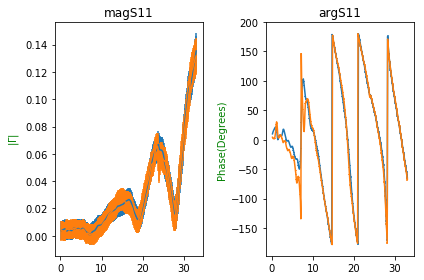

In [6]:
plot_calrep_comparison(calrep_measurements);

In [27]:
montecarlo_reference_curve=create_monte_carlo_reference_curve(monte_carlo_directory=montecarlo_directory,format="MA")
sensitivity_reference_curve=create_sensitivity_reference_curve(nominal_file_path=nominal_path,
                                                               sensitivity_directory=sensitivity_directory,format="MA")

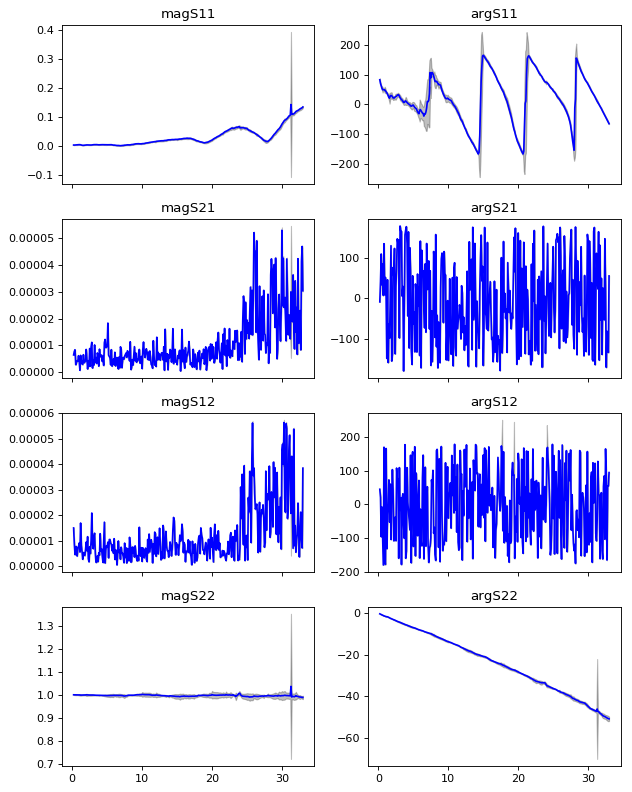

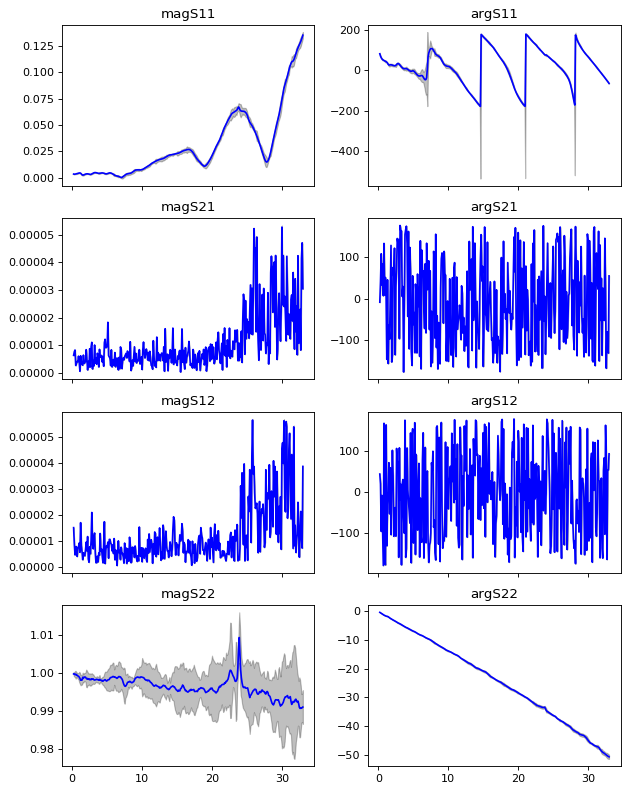

In [8]:
plot_reference_curve(montecarlo_reference_curve);
plot_reference_curve(sensitivity_reference_curve);

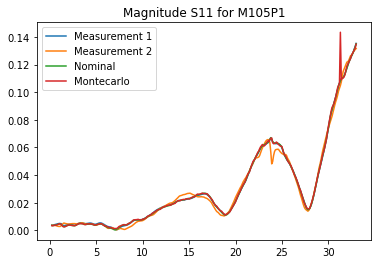

In [9]:
# Now plot all of these together at once
plt.close()

data_list=measurements+[sensitivity_reference_curve,montecarlo_reference_curve]
labels=[]
for index,data in enumerate(data_list):
    if index ==len(data_list)-1:
        labels.append("Montecarlo")
    elif index==len(data_list)-2:
        labels.append("Nominal")
    else:
        labels.append("Measurement {0}".format(index+1))
for index,data in enumerate(data_list):
    plt.plot(data["Frequency"],data["magS11"],label=labels[index])
plt.legend()
plt.title("Magnitude S11 for {0}".format(measurements[0].metadata["Device_Id"]))
plt.show();

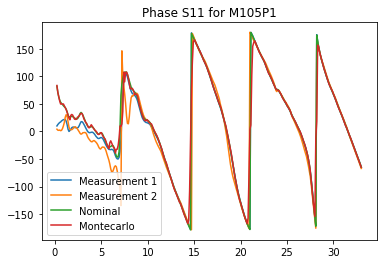

In [29]:
plt.close()

data_list=measurements+[sensitivity_reference_curve,montecarlo_reference_curve]
labels=[]
for index,data in enumerate(data_list):
    if index ==len(data_list)-1:
        labels.append("Montecarlo")
    elif index==len(data_list)-2:
        labels.append("Nominal")
    else:
        labels.append("Measurement {0}".format(index+1))
for index,data in enumerate(data_list):
    plt.plot(data["Frequency"],data["argS11"],label=labels[index])
plt.legend()
plt.title("Phase S11 for {0}".format(measurements[0].metadata["Device_Id"]))
plt.show();

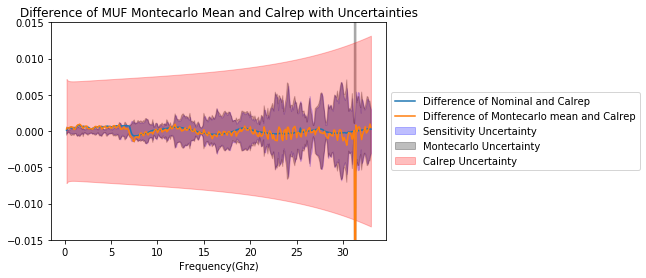

In [11]:
montecarlo_mag=np.array(montecarlo_reference_curve["magS11"])
montecarlo_uncertainty=np.array(montecarlo_reference_curve["umagS11"])
measurement_1_mag=np.array(calrep_measurements[0]["magS11"])
measurement_1_uncertainty=np.array(calrep_measurements[0]["uMgS11"])
nominal_mag=np.array(sensitivity_reference_curve["magS11"])
nominal_uncertainty=np.array(sensitivity_reference_curve["umagS11"])
plt.close()
plt.plot(sensitivity_reference_curve["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="blue",
                        alpha=.25,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.plot(montecarlo_reference_curve["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.25,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim([-.015,.015])
plt.title("Difference of MUF Montecarlo Mean and Calrep with Uncertainties")
plt.show()

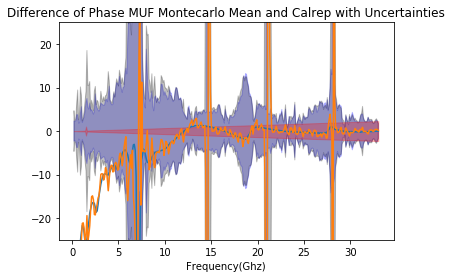

In [12]:
montecarlo_mag=np.array(montecarlo_reference_curve["argS11"])
montecarlo_uncertainty=np.array(montecarlo_reference_curve["uargS11"])
measurement_1_mag=np.array(calrep_measurements[0]["argS11"])
measurement_1_uncertainty=np.array(calrep_measurements[0]["uAgS11"])
nominal_mag=np.array(sensitivity_reference_curve["argS11"])
nominal_uncertainty=np.array(sensitivity_reference_curve["uargS11"])
plt.close()
plt.plot(sensitivity_reference_curve["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="blue",
                        alpha=.25,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.plot(montecarlo_reference_curve["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.25,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
#plt.legend()
plt.ylim([-25,25])
plt.title("Difference of Phase MUF Montecarlo Mean and Calrep with Uncertainties")
plt.show()

## Device M110

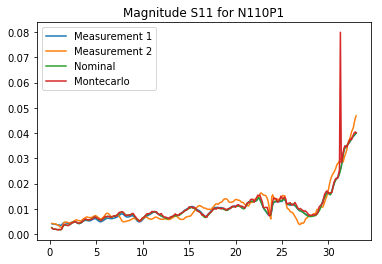

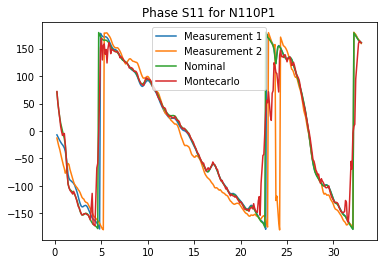

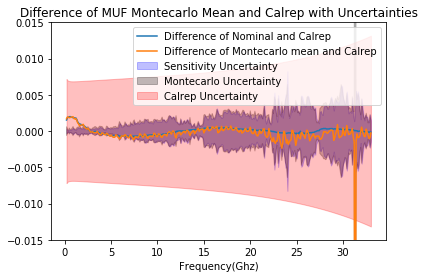

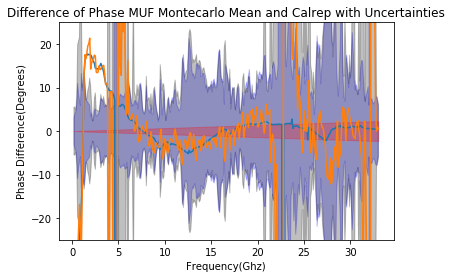

In [13]:
raw_directory=r"C:\Share\35CalComp\35_ascii_results"
montecarlo_directory=r"C:\Share\35CalComp\MUF_results\DUTs\M110P1_Support\MonteCarlo"
sensitivity_directory=r"C:\Share\35CalComp\MUF_results\DUTs\M110P1_Support\Covariance"
nominal_path=r"C:\Share\35CalComp\MUF_results\DUTs\M110P1_Support\M110P1_0.s2p"
measurement_names=['M110P1.L1_030716','M110P2.L1_030716']
model_name=sparameter_power_type(os.path.join(raw_directory,measurement_names[0]))
#raw_type(os.path.join(raw_directory,'M105P1.L1_030716'))
model=globals()[model_name]
measurements=map(lambda x:model(os.path.join(raw_directory,x)),measurement_names)
calrep_measurements=map(lambda x: calrep(x), measurements)
montecarlo_reference_curve=create_monte_carlo_reference_curve(monte_carlo_directory=montecarlo_directory,format="MA")
sensitivity_reference_curve=create_sensitivity_reference_curve(nominal_file_path=nominal_path,
                                                               sensitivity_directory=sensitivity_directory,format="MA")
# Now plot all of these together at once mag first
plt.close()

data_list=measurements+[sensitivity_reference_curve,montecarlo_reference_curve]
labels=[]
for index,data in enumerate(data_list):
    if index ==len(data_list)-1:
        labels.append("Montecarlo")
    elif index==len(data_list)-2:
        labels.append("Nominal")
    else:
        labels.append("Measurement {0}".format(index+1))
for index,data in enumerate(data_list):
    plt.plot(data["Frequency"],data["magS11"],label=labels[index])
plt.legend()
plt.title("Magnitude S11 for {0}".format(measurements[0].metadata["Device_Id"]))
plt.show();

# now phase
plt.close()

data_list=measurements+[sensitivity_reference_curve,montecarlo_reference_curve]
labels=[]
for index,data in enumerate(data_list):
    if index ==len(data_list)-1:
        labels.append("Montecarlo")
    elif index==len(data_list)-2:
        labels.append("Nominal")
    else:
        labels.append("Measurement {0}".format(index+1))
for index,data in enumerate(data_list):
    plt.plot(data["Frequency"],data["argS11"],label=labels[index])
plt.legend()
plt.title("Phase S11 for {0}".format(measurements[0].metadata["Device_Id"]))
plt.show();

#now the difference of mag for measurement one
montecarlo_mag=np.array(montecarlo_reference_curve["magS11"])
montecarlo_uncertainty=np.array(montecarlo_reference_curve["umagS11"])
measurement_1_mag=np.array(calrep_measurements[0]["magS11"])
measurement_1_uncertainty=np.array(calrep_measurements[0]["uMgS11"])
nominal_mag=np.array(sensitivity_reference_curve["magS11"])
nominal_uncertainty=np.array(sensitivity_reference_curve["umagS11"])
plt.close()
plt.plot(sensitivity_reference_curve["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="blue",
                        alpha=.25,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.plot(montecarlo_reference_curve["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.25,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
plt.legend()
plt.ylim([-.015,.015])
plt.title("Difference of MUF Montecarlo Mean and Calrep with Uncertainties")
plt.show();

#now the phase
montecarlo_mag=np.array(montecarlo_reference_curve["argS11"])
montecarlo_uncertainty=np.array(montecarlo_reference_curve["uargS11"])
measurement_1_mag=np.array(calrep_measurements[0]["argS11"])
measurement_1_uncertainty=np.array(calrep_measurements[0]["uAgS11"])
nominal_mag=np.array(sensitivity_reference_curve["argS11"])
nominal_uncertainty=np.array(sensitivity_reference_curve["uargS11"])
plt.close()
plt.plot(sensitivity_reference_curve["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="blue",
                        alpha=.25,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.plot(montecarlo_reference_curve["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.25,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
plt.ylabel("Phase Difference(Degrees)")
#plt.legend()
plt.ylim([-25,25])
plt.title("Difference of Phase MUF Montecarlo Mean and Calrep with Uncertainties")
plt.show()

## Device N101


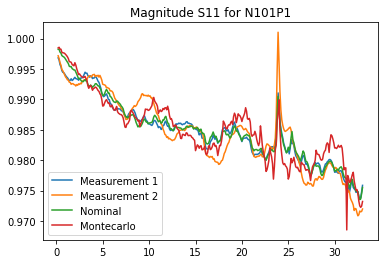

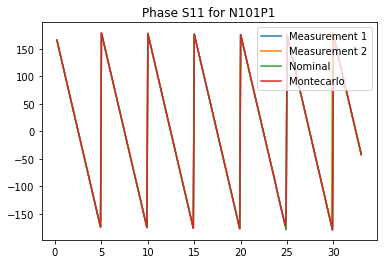

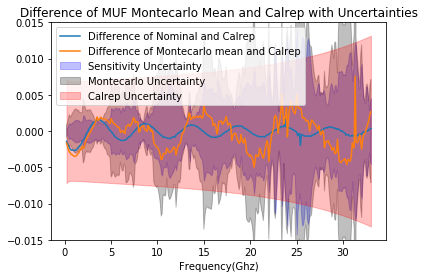

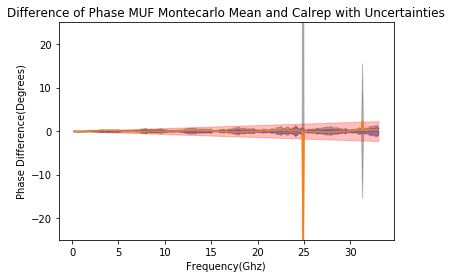

In [14]:
raw_directory=r"C:\Share\35CalComp\35_ascii_results"
montecarlo_directory=r"C:\Share\35CalComp\MUF_results\DUTs\N101P1_Support\MonteCarlo"
sensitivity_directory=r"C:\Share\35CalComp\MUF_results\DUTs\N101P1_Support\Covariance"
nominal_path=r"C:\Share\35CalComp\MUF_results\DUTs\N101P1_Support\N101P1_0.s2p"
measurement_names=['N101P1.L1_030716','N101P2.L1_030716']
model_name=sparameter_power_type(os.path.join(raw_directory,measurement_names[0]))
#raw_type(os.path.join(raw_directory,'M105P1.L1_030716'))
model=globals()[model_name]
measurements=map(lambda x:model(os.path.join(raw_directory,x)),measurement_names)
calrep_measurements=map(lambda x: calrep(x), measurements)
montecarlo_reference_curve=create_monte_carlo_reference_curve(monte_carlo_directory=montecarlo_directory,format="MA")
sensitivity_reference_curve=create_sensitivity_reference_curve(nominal_file_path=nominal_path,
                                                               sensitivity_directory=sensitivity_directory,format="MA")
# Now plot all of these together at once mag first
plt.close()

data_list=measurements+[sensitivity_reference_curve,montecarlo_reference_curve]
labels=[]
for index,data in enumerate(data_list):
    if index ==len(data_list)-1:
        labels.append("Montecarlo")
    elif index==len(data_list)-2:
        labels.append("Nominal")
    else:
        labels.append("Measurement {0}".format(index+1))
for index,data in enumerate(data_list):
    plt.plot(data["Frequency"],data["magS11"],label=labels[index])
plt.legend()
plt.title("Magnitude S11 for {0}".format(measurements[0].metadata["Device_Id"]))
plt.show();

# now phase
plt.close()

data_list=measurements+[sensitivity_reference_curve,montecarlo_reference_curve]
labels=[]
for index,data in enumerate(data_list):
    if index ==len(data_list)-1:
        labels.append("Montecarlo")
    elif index==len(data_list)-2:
        labels.append("Nominal")
    else:
        labels.append("Measurement {0}".format(index+1))
for index,data in enumerate(data_list):
    plt.plot(data["Frequency"],data["argS11"],label=labels[index])
plt.legend()
plt.title("Phase S11 for {0}".format(measurements[0].metadata["Device_Id"]))
plt.show();

#now the difference of mag for measurement one
montecarlo_mag=np.array(montecarlo_reference_curve["magS11"])
montecarlo_uncertainty=np.array(montecarlo_reference_curve["umagS11"])
measurement_1_mag=np.array(calrep_measurements[0]["magS11"])
measurement_1_uncertainty=np.array(calrep_measurements[0]["uMgS11"])
nominal_mag=np.array(sensitivity_reference_curve["magS11"])
nominal_uncertainty=np.array(sensitivity_reference_curve["umagS11"])
plt.close()
plt.plot(sensitivity_reference_curve["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="blue",
                        alpha=.25,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.plot(montecarlo_reference_curve["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.25,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
plt.legend()
plt.ylim([-.015,.015])
plt.title("Difference of MUF Montecarlo Mean and Calrep with Uncertainties")
plt.show();

#now the phase
montecarlo_mag=np.array(montecarlo_reference_curve["argS11"])
montecarlo_uncertainty=np.array(montecarlo_reference_curve["uargS11"])
measurement_1_mag=np.array(calrep_measurements[0]["argS11"])
measurement_1_uncertainty=np.array(calrep_measurements[0]["uAgS11"])
nominal_mag=np.array(sensitivity_reference_curve["argS11"])
nominal_uncertainty=np.array(sensitivity_reference_curve["uargS11"])
plt.close()
plt.plot(sensitivity_reference_curve["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="blue",
                        alpha=.25,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.plot(montecarlo_reference_curve["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.25,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
plt.ylabel("Phase Difference(Degrees)")
#plt.legend()
plt.ylim([-25,25])
plt.title("Difference of Phase MUF Montecarlo Mean and Calrep with Uncertainties")
plt.show()

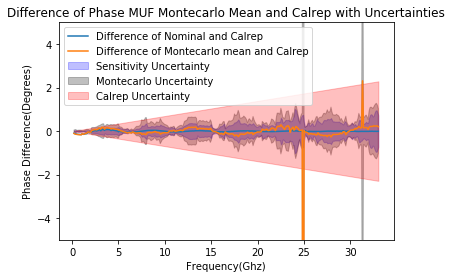

In [15]:
plt.close()
plt.plot(sensitivity_reference_curve["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="blue",
                        alpha=.25,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.plot(montecarlo_reference_curve["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.25,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
plt.ylabel("Phase Difference(Degrees)")
#plt.legend()
plt.ylim([-5,5])
plt.title("Difference of Phase MUF Montecarlo Mean and Calrep with Uncertainties")
plt.legend()
plt.show()

In [16]:
def unwrap_phase(phase_list):
    """Takes a phase list and returns one without any jumps greater than 90 degrees, units are assumed to be degrees"""
    phase_list_copy=phase_list[:]
    i=1
    n=0
    while(i+1<len(phase_list)):
        if abs(phase_list[i]-phase_list[i-1])>90:
            if phase_list[i]-phase_list[i-1]>0:
                n+=1
            else:
                n-=1
            phase_list_copy[i]=phase_list_copy[i+1]-n*360        
        phase_list_copy[i+1]=phase_list_copy[i+1]-n*360
        i+=1    

    return phase_list_copy


        

In [17]:
%matplotlib?

In [18]:
%matplotlib qt5
f=measurements[0]["Frequency"]
plt.plot(f,unwrap_phase(measurements[0]["argS11"]))
plt.plot(f,measurements[0]["argS11"])
plt.show()

In [19]:
unwrap_phase(measurements[0]["argS11"])[-1]

-2202.069

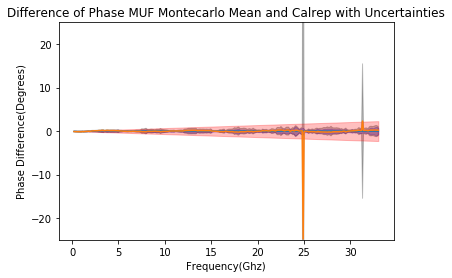

In [20]:
%matplotlib inline
#now the phase
montecarlo_mag=np.array(unwrap_phase(montecarlo_reference_curve["argS11"]))
montecarlo_uncertainty=np.array(montecarlo_reference_curve["uargS11"])
measurement_1_mag=np.array(unwrap_phase(calrep_measurements[0]["argS11"]))
measurement_1_uncertainty=np.array(calrep_measurements[0]["uAgS11"])
nominal_mag=np.array(unwrap_phase(sensitivity_reference_curve["argS11"]))
nominal_uncertainty=np.array(sensitivity_reference_curve["uargS11"])
plt.close()
plt.plot(sensitivity_reference_curve["Frequency"],measurement_1_mag-nominal_mag,label="Difference of Nominal and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*nominal_uncertainty,nominal_uncertainty,
                        color="blue",
                        alpha=.25,
                        edgecolor="black",label="Sensitivity Uncertainty")
plt.plot(montecarlo_reference_curve["Frequency"],measurement_1_mag-montecarlo_mag,label="Difference of Montecarlo mean and Calrep")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*montecarlo_uncertainty,montecarlo_uncertainty,
                        color="black",
                        alpha=.25,
                        edgecolor="black",label="Montecarlo Uncertainty")
plt.fill_between(sensitivity_reference_curve["Frequency"] ,-1*measurement_1_uncertainty,measurement_1_uncertainty,
                        color="red",
                        alpha=.25,
                        edgecolor="red",label="Calrep Uncertainty")
plt.xlabel("Frequency(Ghz)")
plt.ylabel("Phase Difference(Degrees)")
#plt.legend()
plt.ylim([-25,25])
plt.title("Difference of Phase MUF Montecarlo Mean and Calrep with Uncertainties")
plt.show()

In [21]:
test=OnePortRawModel(os.path.join(raw_directory,'M110P2.L1_030716'))

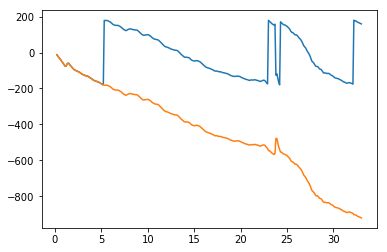

In [22]:
plt.plot(test["Frequency"],test["argS11"])
plt.plot(test["Frequency"],unwrap_phase(test["argS11"]))

In [23]:
    figure, axes = plt.subplots(ncols=number_columns, nrows=number_rows, sharex=plot_options["share_x"],
                                figsize=plot_options["plot_size"], dpi=plot_options["dpi"])


NameError: name 'number_columns' is not defined